# Example usage

In this example we are predicting the 5th and 95th percentile and median of a toy dataset with a Random Forest Quantile
Regressor, and the approximation regressor and comparing it to a general Random Forest Regressor.

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn_quantile import (
    RandomForestQuantileRegressor,
    SampleRandomForestQuantileRegressor,
)

The base function 'generating' the observations

In [6]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

Observations data are generated

In [7]:
rng = np.random.RandomState(42)
X = np.atleast_2d(rng.uniform(0, 10.0, size=1000)).T
expected_y = f(X).ravel()

sigma = 0.5 + X.ravel() / 10
noise = rng.lognormal(sigma=sigma) - np.exp(sigma ** 2 / 2)
y = expected_y + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Models are initaliased, with the same common parameters to make the estimates
comparable

In [8]:
common_params = dict(
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=4,
)
qrf = RandomForestQuantileRegressor(**common_params, q=[0.05, 0.5, 0.95])
qrf.fit(X_train, y_train)

sqrf = SampleRandomForestQuantileRegressor(**common_params, q=[0.05, 0.5, 0.95])
sqrf.fit(X_train, y_train)

rf = RandomForestRegressor(**common_params)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=4)

Prediction are done all at once. The quantile models return the different quantiles
on the first axes if more than one is given (i.e. shape=(n_quantiles, n_samples)).
Afterwards they are splitted for plotting purposes.

In [11]:
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T

predictions = qrf.predict(xx)
s_predictions = sqrf.predict(xx)

y_pred = rf.predict(xx)

y_lower = predictions[0]
y_med = predictions[1]
y_upper = predictions[2]

y_s_lower = s_predictions[0]
y_s_med = s_predictions[1]
y_s_upper = s_predictions[2]

Plotting the results:

/var/folders/dl/b3rz1nb55sqgldl8hnzqvz0m0000gn/T/ipykernel_46823/1808449769.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, y_med, 'r-', label='Predicted median', color="orange")
/var/folders/dl/b3rz1nb55sqgldl8hnzqvz0m0000gn/T/ipykernel_46823/1808449769.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xx, y_s_med, 'r-', label='Aproximation predicted median', color="orange", linestyle="--")
/var/folders/dl/b3rz1nb55sqgldl8hnzqvz0m0000gn/T/ipykernel_46823/1808449769.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xx, y_s_med, 'r-', label='Aproximation predicted median', color="orange", linestyle="--")

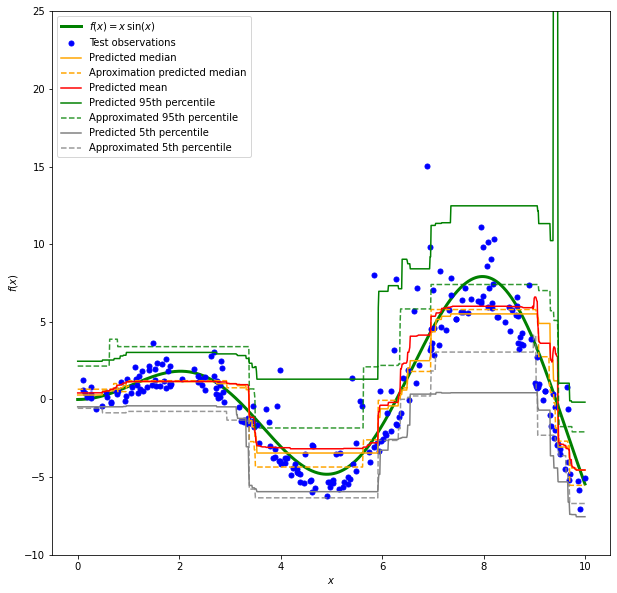

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.plot(xx, f(xx), 'g', linewidth=3, label=r'$f(x) = x\,\sin(x)$')
plt.plot(X_test, y_test, 'b.', markersize=10, label='Test observations')

plt.plot(xx, y_med, 'r-', label='Predicted median', color="orange")
plt.plot(xx, y_s_med, 'r-', label='Aproximation predicted median', color="orange", linestyle="--")
plt.plot(xx, y_pred, 'r-', label='Predicted mean')

plt.plot(xx, y_upper, 'g', label='Predicted 95th percentile')
plt.plot(xx, y_s_upper, 'g--', alpha=0.8, label='Approximated 95th percentile')
plt.plot(xx, y_lower, 'grey', label='Predicted 5th percentile')
plt.plot(xx, y_s_lower, 'grey', linestyle='--', alpha=0.8, label='Approximated 5th percentile')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 25)
plt.legend(loc='upper left')
plt.savefig("example.png", dpi=300, bbox_inches='tight')
plt.show()

This shows that the median is very close to the mean, as could be expected with the
normally distributed random noise. The quantiles indeed following the expected trend
(with the sample approximation model coming very close to the original quantile model),
although their accuracy could be higher. The optimisation process can be seen in the
second example notebook.

Note that although the models are capable of predicting the three quantilesa at once,
the optimal Random Forest parameters are not necessarily the same. The lower quantiles
in this case are much better behaved than the higher ones. In the second notebook the
quantiles are optimised separately, leading to much higher accuracy.